# City Couriers Fleet Churn Report

# Data Analysis Report

Author: Guilherme Fernandes Ribeiro

# Executive Summary

<li>From the 7524 couriers in the database, only 387 (5,14%) worked on the churn window (weeks 9, 10 and 11).</li><br><br>

<li>Taking into account only couriers that showed activities in the last 8 weeks (729 couriers), 50,07% (365) worked on the churn window.</li><br><br>

<li>Thus, the city's courier fleet has a high churn ratio.</li><br><br>

<li>Couriers that keep a constant week activity during several weeks are more likely to not churn in the following weeks.</li><br><br>

<li>Regarding the last 8 weeks, couriers that have worked more than 4 weeks are more likely to not churn in the churn window.</li>

# Data Analysis

This report uses a private python library written by the author called "courier_data_manager". All the documentation needed is inside the library script file that can be found in the same folder of this report.

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import courier_data_manager as cdm

For this report, the churn window (weeks of interesting) are weeks 9, 10 and 11. In order to build a predictive model, the weeks from 0 to 7 are going to be analyzed (period of analysis).

In [2]:
#Constants
churnWeeks = [9, 10, 11]
weeksToRemove = [8, 9, 10, 11]

# Loading the data

In [3]:
courier_life_data_path = "Courier_lifetime_data.csv"
courier_weekly_data_path = "Courier_weekly_data.csv"

courier_life_data = pd.read_csv(courier_life_data_path, header = 0, index_col = 0)
courier_weekly_data = pd.read_csv(courier_weekly_data_path, header = 0)

# Data Profiling

For the univariate analysis of the data provided, two extra reports were generated. They can be found in the same folder of this present report.

The file "courier_lifetime_profile.html" holds the univariate analysis of the courier's lifetime data.
The file "courier_weekly_profile.html" holds the univariate analysis of the courier's weekly activities data.

In [ ]:
courier_life_profile = courier_life_data.profile_report(title = "Courier Lifetime Features")
courier_life_profile.to_file(output_file = "courier_lifetime_profile.html")

In [ ]:
courier_weekly_profile = courier_weekly_data.profile_report(title = "Courier Weekly Features")
courier_weekly_profile.to_file(output_file = "courier_weekly_profile.html")

## Courier's lifetime data

Checking the Courier Lifetime Features report, we can see that this data has 3 features: "courier", "feature_1" and "feature_2".

The "courier" feature contains the courier's id. The "feature_1" is a categorical column that can be one of the following values: 'a', 'b, 'c' and 'd'. The "feature_2" column is numerical and has 12,4% of missing data. In the Extreme Values section, we can check some outliers values in both edges (-61 as lowest value and 954, 928 and 921 as highest values).

Since there is a significant number of missing values, some outliers and the real meaning of the "feature_2" is not provided, this feature will be out of the prediction modeling.

## Courier's weekly data

The courier's weekly data has 19 features which only the following features are identified: "courier" and "week".
No missing values were found in this dataset. All the data is numerical and no significant outliers were found.

# Plots

Checking the courier's lifetime data, there are 7524 couriers in the city database.

Only 387 couriers showed at least one activity during the churn window. Then, probably, this city has a high churn rate.

Below we can check this proportion in a pie chart.

In [20]:
labels_couriers = cdm.labelCourier(courier_life_data.index, courier_weekly_data, churnWeeks)

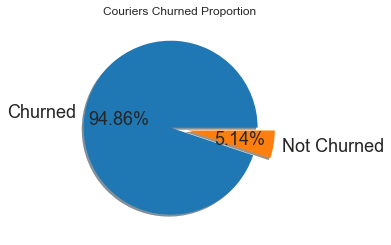

In [21]:
churned_count = sum(labels_couriers.churned)
not_churned_count = len(labels_couriers) - churned_count
churnedNotChurnedSizes = [churned_count, not_churned_count]

plt.pie(churnedNotChurnedSizes, explode = [0.1, 0.1], autopct = '%1.2f%%', labels = ['Churned', 'Not Churned'], 
        shadow = True, textprops={'fontsize': 18})
plt.title("Couriers Churned Proportion")
plt.show()

The plot below shows how different is the behavior of the two groups of interest (Churned and Not Churned groups) regarding their weekly activities.

The Not Churned group kept its activity almost constant throughout the period of analysis (from week 0 to 7).<br>
The Churned group, on the other hand, showed a decrease in its activities as time passes.

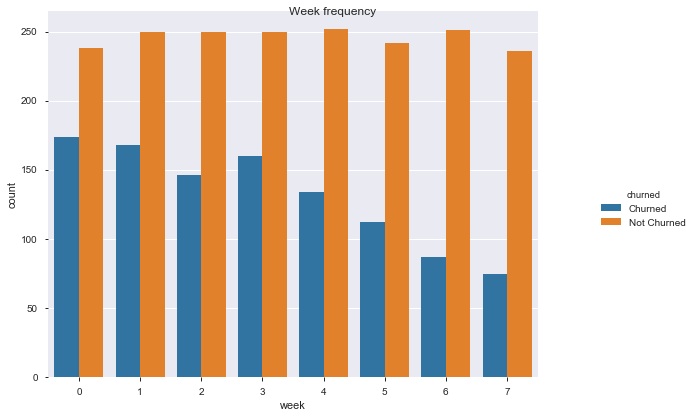

In [22]:
prepared_data = cdm.remove_weeks(courier_weekly_data, weeksToRemove)

weeks_churned = cdm.add_churn_col(prepared_data[['courier', 'week']], labels_couriers, 'Churned', 'Not Churned')

weekChurnedPlot = sns.catplot(data = weeks_churned, x = 'week', kind = 'count', hue = 'churned')
weekChurnedPlot.fig.suptitle("Week frequency")
weekChurnedPlot.fig.set_size_inches(10,6)

plt.show()

Regarding the number of weeks worked during the period of analysis, again, the two groups showed different characteristics.

The Not Churn group usually has more weeks worked than the Churn group in the weeks from 0 to 7.

Analyzing the probability density plot and the box plot below is possible to visualize the difference mentioned above. Moreover, if a courier has worked more than 4 weeks during the period, it is more likely this courier to be in the Not Churn group.

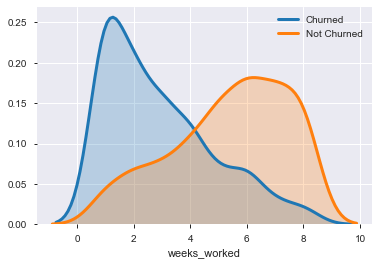

In [23]:
n_week_worked = cdm.weeksWorked(prepared_data)
n_week_worked = cdm.add_churn_col(n_week_worked, labels_couriers, 'Churned', 'Not Churned')

n_week_worked_churned = n_week_worked.loc[n_week_worked.churned == 'Churned', 'weeks_worked']
n_week_worked_not_churned = n_week_worked.loc[n_week_worked.churned == 'Not Churned', 'weeks_worked']

sns.distplot(n_week_worked_churned, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Churned')
sns.distplot(n_week_worked_not_churned, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Not Churned')

plt.show()

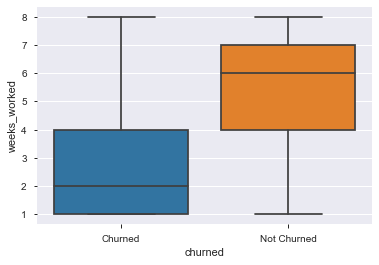

In [24]:
sns.boxplot(data = n_week_worked, x="churned", y="weeks_worked")
plt.show()

Analyzing only the period from week 0 to week 7, only 729 out of 7524 couriers in the database showed some activity.

From this 729 couriers, 365 did not churn in the weeks 9, 10 and 11, which is basically the half of them.

This reinforces the high churn ratio this city has.

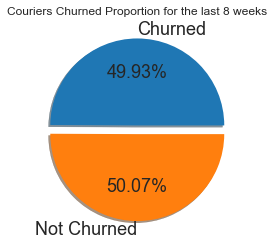

In [25]:
last_weeks_churned_count = sum(n_week_worked.churned == 'Churned')
last_weeks_not_churned_count = len(n_week_worked) - last_weeks_churned_count
last_weeks_churnedNotChurnedSizes = [last_weeks_churned_count, last_weeks_not_churned_count]

plt.pie(last_weeks_churnedNotChurnedSizes, explode = [0.05, 0.05], autopct = '%1.2f%%', labels = ['Churned', 'Not Churned'], 
        shadow = True, textprops={'fontsize': 18})
plt.title("Couriers Churned Proportion for the last 8 weeks")
plt.show()

# Summarized Data Profile

In order to prepare the data for classification prediction, the courier's lifetime and weekly activities data were summarized.

All the steps for this preparation are described in the Machine-Learning Model Report. It is also possible to check the function 'prepare_data_for_modeling' inside the "courier_data_manager" library for better technical understanding.

The same kind of univariate analysis report used in the section "Data Profiling" was generated for this summarized data. The report can be found in the "prepared_data_profile.html" file.

In [18]:
data_modeling = cdm.prepare_data_for_modeling(courier_life_data, courier_weekly_data, weeksToRemove, churnWeeks)

In [19]:
data_modeling_profile = data_modeling.profile_report(title = "Prepared data profile")
data_modeling_profile.to_file(output_file = "prepared_data_profile.html")

Analyzing the report generated, we can see that many features have high collinearity among each other and can be discarded from the machine-learn training phase.

# Conclusions

This present work has shown the difference of behavior between the two groups of interest of couriers: Churn and Not Churn group.

It is notable the high churn rate of the city analyzed.

Bringing these two pieces of information together, it is possible to target a marketing campaign for those couriers that are more likely to churn in the churn window and try to increase the city fleet during the period of interest. In order to identify those couriers is possible to use a classification algorithm that will be explained in more detail in the Machine-Learning Model Report.